In [37]:
import pandas as pd
import mlflow
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
import pickle

In [28]:
# Load dataset
data = pd.read_csv("C:/Users/oquach/OneDrive - Iliad/Documents/OpenClassRoom/Credit_default_risk/home_credit_default_risk_42columns.csv",sep=',',index_col = False)

Prep the data

In [29]:
X = data.drop(['TARGET'], axis=1)
y = data.TARGET
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
# Normalisation des données :
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:

# Sur-échantillonnage de la classe minoritaire avec SMOTE
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote = y_train_smote.astype(int)
y_test = y_test.astype(int)

Logistic Regression

In [32]:
# Define experiment name
experiment_name = "credit_default_risk_logistic_reg_Exp"

# Set the experiment name
mlflow.set_experiment(experiment_name)

# Define run name
run_name = "LogisticRegression_Run_2"

2025/01/06 22:08:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


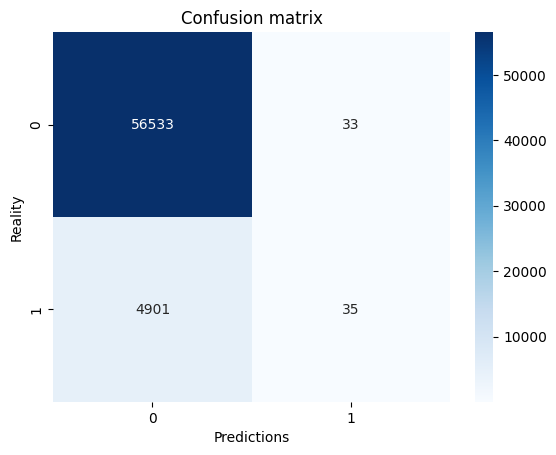

Run ID: a06e223f87f54adb9a7ddf6656956d77
Logged Parameters:
Logged Metrics:
accuracy: 0.9197749666677506
Model Artifact URI: file:///c:/Users/oquach/OneDrive%20-%20Iliad/Documents/OpenClassRoom/Credit_default_risk/credit_default_risk/notebooks/mlruns/722871155681016879/a06e223f87f54adb9a7ddf6656956d77/artifacts


In [40]:
# Start the MLflow run with a specific run name
with mlflow.start_run(run_name=run_name):

    # Model training
    model = LogisticRegression(max_iter = 6000, solver='saga', random_state=808)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Classificaton report
    report = classification_report(y_test, y_pred)

    # Log the model with input example
    mlflow.sklearn.log_model(model, "logistic_regression_model")

    # Log metrics (optional)
    mlflow.log_metric("accuracy", model.score(X_test, y_test))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion matrix")
    plt.xlabel("Predictions")
    plt.ylabel("Reality")
    plt.savefig("confusion_matrix.png")
    plt.show()

    # log of confusion matrix
    mlflow.log_artifact("confusion_matrix.png")

    # Print out the current logged details of the MLflow run
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID: {run_id}")

    # Fetch the logged parameters
    params = mlflow.get_run(run_id).data.params
    print("Logged Parameters:")
    for param in params:
        print(f"{param}: {params[param]}")

    # Fetch the logged metrics
    metrics = mlflow.get_run(run_id).data.metrics
    print("Logged Metrics:")
    for metric in metrics:
        print(f"{metric}: {metrics[metric]}")

    # Fetch the logged model artifact URI
    artifact_uri = mlflow.get_artifact_uri()
    print(f"Model Artifact URI: {artifact_uri}")

# End the run
mlflow.end_run()

In [39]:
# Save the model
with open("C:/Users/oquach/OneDrive - Iliad/Documents/OpenClassRoom/Credit_default_risk/credit_default_risk/models/logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [18]:
# Define experiment name
experiment_name = "credit_default_risk_dummy_classifier_Exp"

# Set the experiment name
mlflow.set_experiment(experiment_name)

# Define run name
run_name = "DummyClassifier_Run_2"

2025/01/06 17:46:08 INFO mlflow.tracking.fluent: Experiment with name 'credit_default_risk_dummy_classifier_Exp' does not exist. Creating a new experiment.


In [19]:
# Start the MLflow run with a specific run name
with mlflow.start_run(run_name=run_name):

    # Model training
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X_train, y_train)

    # Log the model with input example
    mlflow.sklearn.log_model(dummy_clf, "dummy_classifier_model", input_example=input_example)

    # Log metrics (optional)
    mlflow.log_metric("accuracy", dummy_clf.score(X_test, y_test))

    # Print out the current logged details of the MLflow run
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID: {run_id}")

    # Fetch the logged parameters
    params = mlflow.get_run(run_id).data.params
    print("Logged Parameters:")
    for param in params:
        print(f"{param}: {params[param]}")

    # Fetch the logged metrics
    metrics = mlflow.get_run(run_id).data.metrics
    print("Logged Metrics:")
    for metric in metrics:
        print(f"{metric}: {metrics[metric]}")

    # Fetch the logged model artifact URI
    artifact_uri = mlflow.get_artifact_uri()
    print(f"Model Artifact URI: {artifact_uri}")

# End the run
mlflow.end_run()

Run ID: 4e69d1df406944d7bab6d95261822f2d
Logged Parameters:
Logged Metrics:
accuracy: 0.9212058144450587
Model Artifact URI: file:///c:/Users/oquach/OneDrive%20-%20Iliad/Documents/OpenClassRoom/Credit_default_risk/credit_default_risk/notebooks/mlruns/955952066548785278/4e69d1df406944d7bab6d95261822f2d/artifacts


In [20]:
# Save the model
with open("C:/Users/oquach/OneDrive - Iliad/Documents/OpenClassRoom/Credit_default_risk/credit_default_risk/models/dummy_classifier_model.pkl", "wb") as f:
    pickle.dump(dummy_clf, f)

In [21]:
# Define experiment name
experiment_name = "credit_default_risk_random_forest_classifier_Exp"

# Set the experiment name
mlflow.set_experiment(experiment_name)

# Define run name
run_name = "RandomForestClassifier_Run_2"

2025/01/06 17:52:44 INFO mlflow.tracking.fluent: Experiment with name 'credit_default_risk_random_forest_classifier_Exp' does not exist. Creating a new experiment.


In [22]:
with mlflow.start_run(run_name=run_name):

    # Model training
    rf_clf = RandomForestClassifier(n_estimators = 100)
    rf_clf.fit(X_train, y_train)

    # Log the model with input example
    mlflow.sklearn.log_model(rf_clf, "random_forest_classifier_model", input_example=input_example)

    # Log metrics (optional)
    mlflow.log_metric("accuracy", rf_clf.score(X_test, y_test))

    # Print out the current logged details of the MLflow run
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID: {run_id}")

    # Fetch the logged parameters
    params = mlflow.get_run(run_id).data.params
    print("Logged Parameters:")
    for param in params:
        print(f"{param}: {params[param]}")

    # Fetch the logged metrics
    metrics = mlflow.get_run(run_id).data.metrics
    print("Logged Metrics:")
    for metric in metrics:
        print(f"{metric}: {metrics[metric]}")

    # Fetch the logged model artifact URI
    artifact_uri = mlflow.get_artifact_uri()
    print(f"Model Artifact URI: {artifact_uri}")

# End the run
mlflow.end_run()

Run ID: ddb60a18bbee4547893864fe0e77db82
Logged Parameters:
Logged Metrics:
accuracy: 0.9214334493187213
Model Artifact URI: file:///c:/Users/oquach/OneDrive%20-%20Iliad/Documents/OpenClassRoom/Credit_default_risk/credit_default_risk/notebooks/mlruns/513326881395720947/ddb60a18bbee4547893864fe0e77db82/artifacts


In [25]:
# Save the model
with open("C:/Users/oquach/OneDrive - Iliad/Documents/OpenClassRoom/Credit_default_risk/credit_default_risk/models/randomforest_classifier_model.pkl", "wb") as f:
    pickle.dump(rf_clf, f)